<a href="https://colab.research.google.com/github/SinghLavanya/Healthcare_Insurance/blob/main/Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collections

In [ ]:
#loading the data from .csv file to pandas Dataframe
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
#show first 5 rows of the data
insurance_dataset.head()
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# more details on the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


attributes like "Sex","smoker" and "region" are non-numerical or categorical feature
.

In [ ]:
#checking if our data have any missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data analysis for the given data


In [ ]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Plots


<ipython-input-9-4eb60e95fb3b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


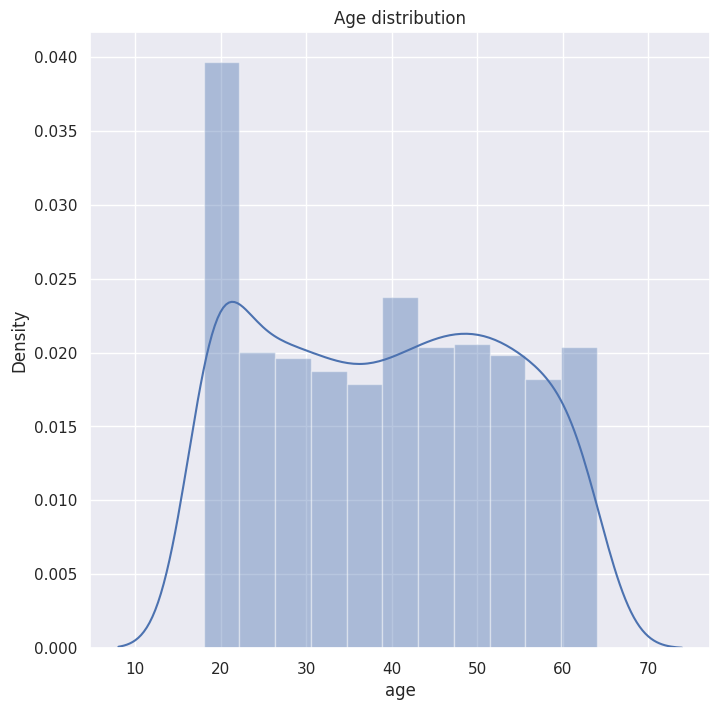

In [ ]:
#distribution of age
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

<ipython-input-10-d357f3f6c09c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['children'])


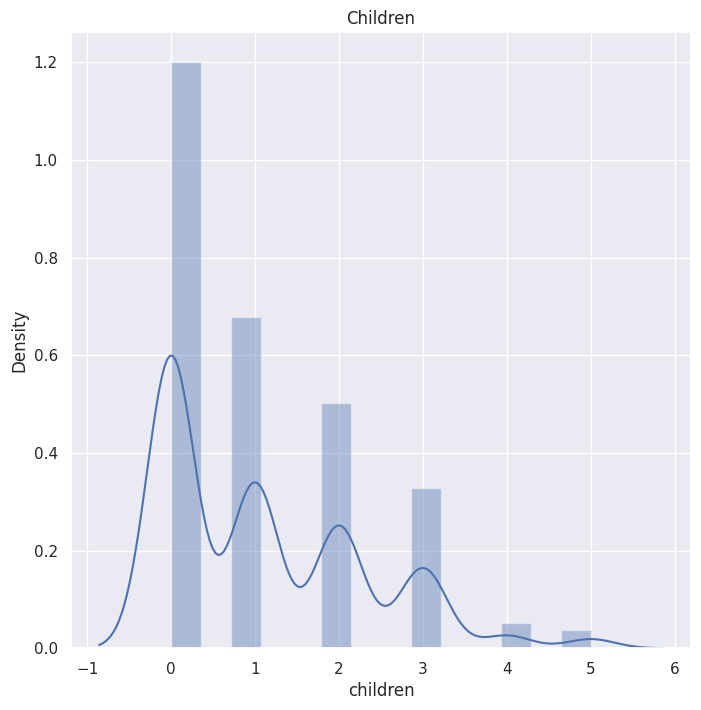

In [ ]:
#No. of children across the dataset
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_dataset['children'])
plt.title('Children')
plt.show()

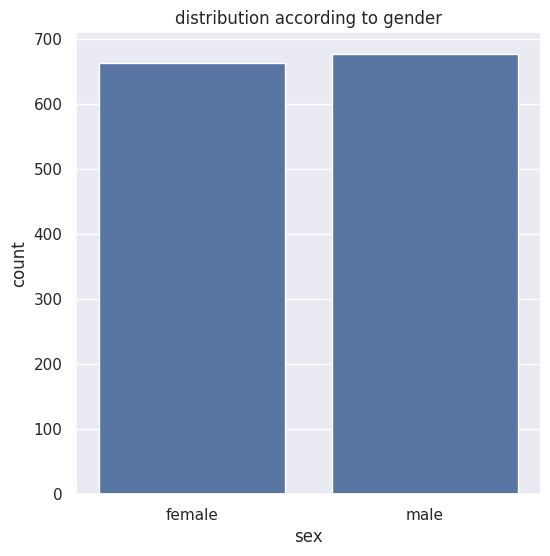

In [ ]:
#gender colum
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('distribution according to gender')
plt.show()

In [ ]:
 insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-13-4b15ddd87c1e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


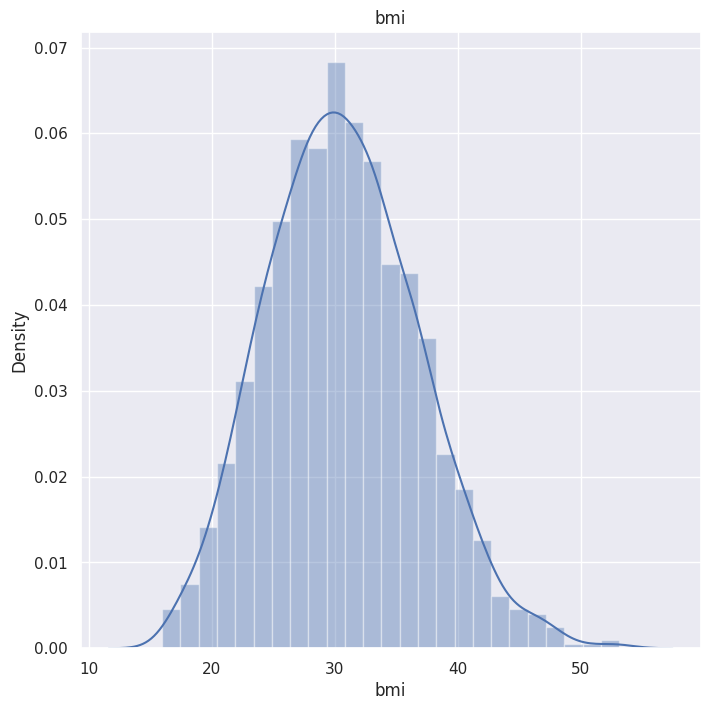

In [ ]:
#distribution of BMI across the datset
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi')
plt.show()

BMI ranges
1. Normal range - 18.5 to 24.9
2. Obese - >24.9


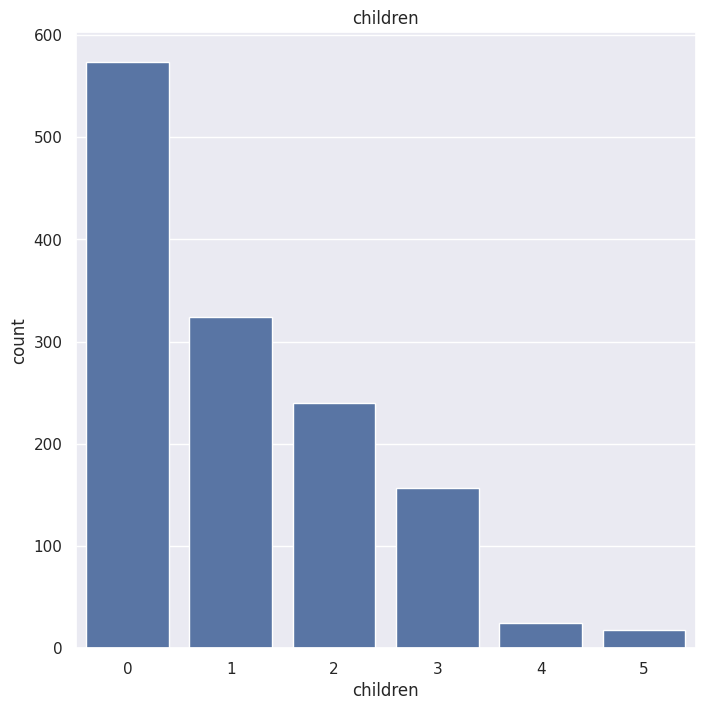

In [ ]:
#children column
plt.figure(figsize=(8,8))
sns.countplot(x='children',data= insurance_dataset)
plt.title('children')
plt.show()

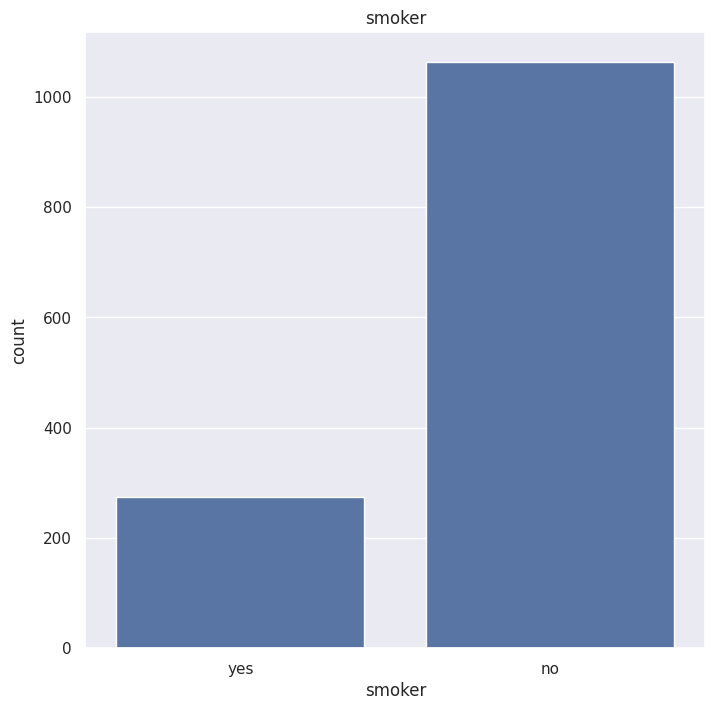

In [ ]:
#smoker_column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data= insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
 insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


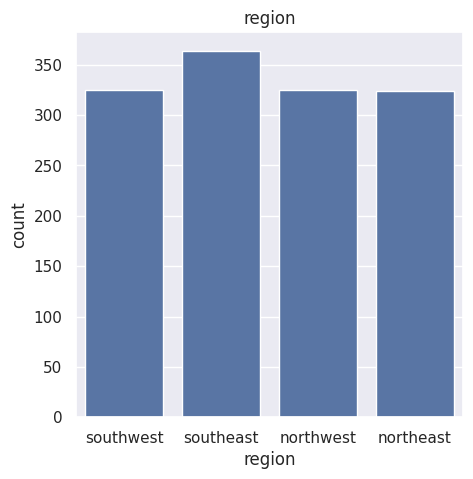

In [ ]:
#region_column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data= insurance_dataset)
plt.title('region')
plt.show()

<ipython-input-18-bd027fcf4c9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


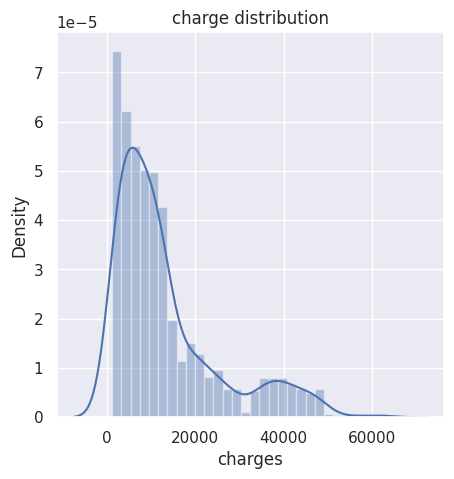

In [ ]:
#distribution of charges
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['charges'])
plt.title('charge distribution')
plt.show()

Data Prepossesing
Creation of labels for the categorical data.



In [ ]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3,}}, inplace=True)


<ipython-input-19-ad59f480e231>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
<ipython-input-19-ad59f480e231>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
<ipython-input-19-ad59f480e231>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [ ]:
X= insurance_dataset.drop(columns='charges', axis=1)
Y =insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


splitting the data into training and testing data


In [ ]:
#splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (802, 6) (536, 6)


Model Training

In [ ]:
#LinearRegression Model
regressor = LinearRegression()


In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation


In [ ]:
#prediction of training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R squared value
r2_training = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :' , r2_training)

R squared value : 0.733531801073114


In [ ]:
#prediction of training data
test_data_prediction = regressor.predict(X_test)

In [ ]:
#R squared value
r2_testing = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_testing)

R squared value :  0.7679551486173053


Since the r square value for test and training data is close by, suggesting that our model fits properly.


Predicting the charge, based on demographic attributes

In [ ]:
input_data = (31,1,25.74, 0, 1,0)
#changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


prediction = regressor.predict(input_data_reshaped)

print('The insurance cost is $ ', prediction[0])

The insurance cost is $  3825.669295343838


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
